# CAR PRICE PREDICTION

### IMPORT THE NECESSARY HEADER FILES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("car data.csv")

In [5]:
print(data)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [6]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## CHECKING FOR NULL VALUES

In [8]:
print(data.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [9]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [10]:
data.shape

(301, 9)

In [11]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

## CHECKING FOR DUPLICATE VALUE

In [12]:
data.duplicated().sum()


np.int64(2)

In [13]:
data=data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

In [14]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## DATA VISUALIZATION

<Axes: xlabel='Fuel_Type', ylabel='count'>

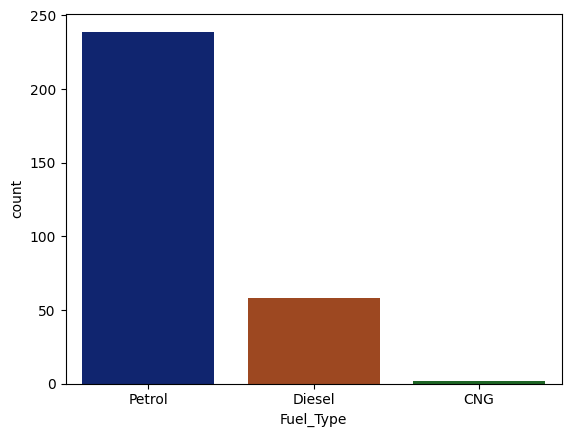

In [15]:
sns.countplot(x='Fuel_Type', data=data, palette='dark')

<Axes: xlabel='Selling_type', ylabel='count'>

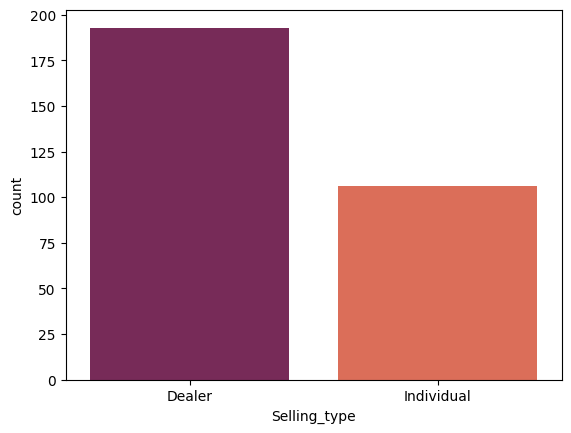

In [16]:
sns.countplot(x='Selling_type',data=data,palette='rocket')

<Axes: xlabel='Transmission', ylabel='count'>

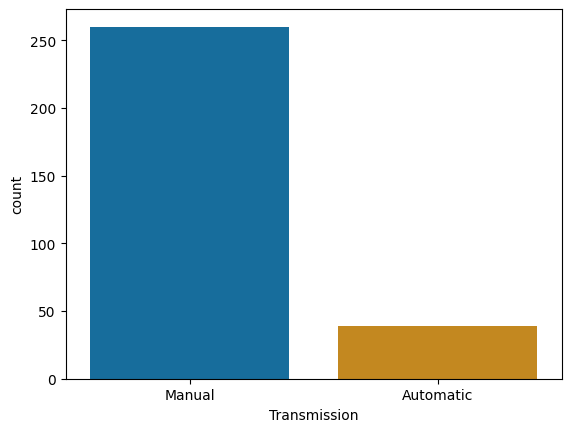

In [17]:
sns.countplot(x='Transmission',data=data,palette='colorblind')

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

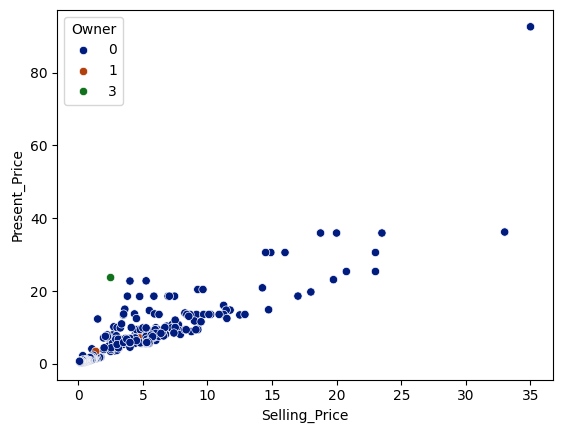

In [19]:
sns.scatterplot(data=car,x='Selling_Price',y='Present_Price',hue='Owner',palette='dark')

<Axes: xlabel='Year', ylabel='Selling_Price'>

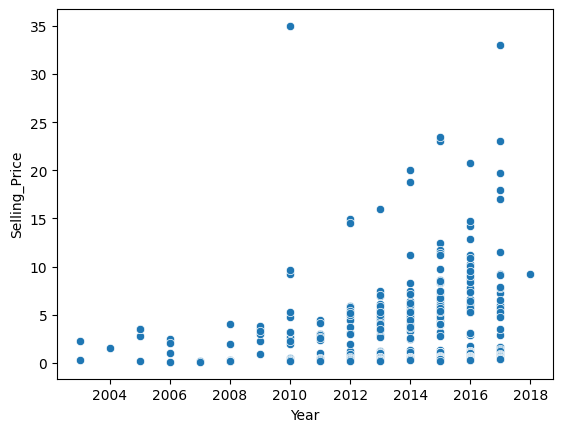

In [20]:
sns.scatterplot(data=data,y='Selling_Price',x='Year',palette='colorblind')

In [18]:
car=data.drop(columns=['Car_Name','Fuel_Type', 'Selling_type', 'Transmission'])
car.head(3)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0


In [21]:
car_correlation=car.corr()
print(car_correlation)

                   Year  Selling_Price  Present_Price  Driven_kms     Owner
Year           1.000000       0.234369      -0.053167   -0.525714 -0.181639
Selling_Price  0.234369       1.000000       0.876305    0.028566 -0.087880
Present_Price -0.053167       0.876305       1.000000    0.205224  0.009948
Driven_kms    -0.525714       0.028566       0.205224    1.000000  0.089367
Owner         -0.181639      -0.087880       0.009948    0.089367  1.000000


<Axes: >

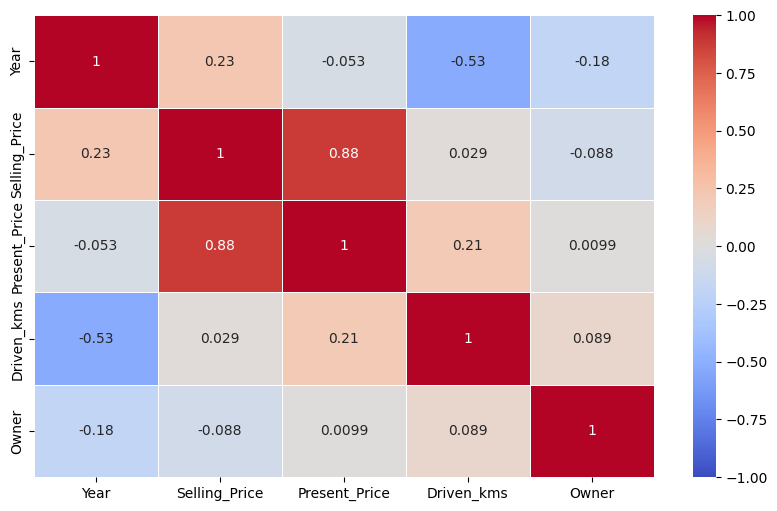

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data=car_correlation,annot=True,vmin=-1,linewidths=0.4,linecolor='white',cmap='coolwarm',center=False)

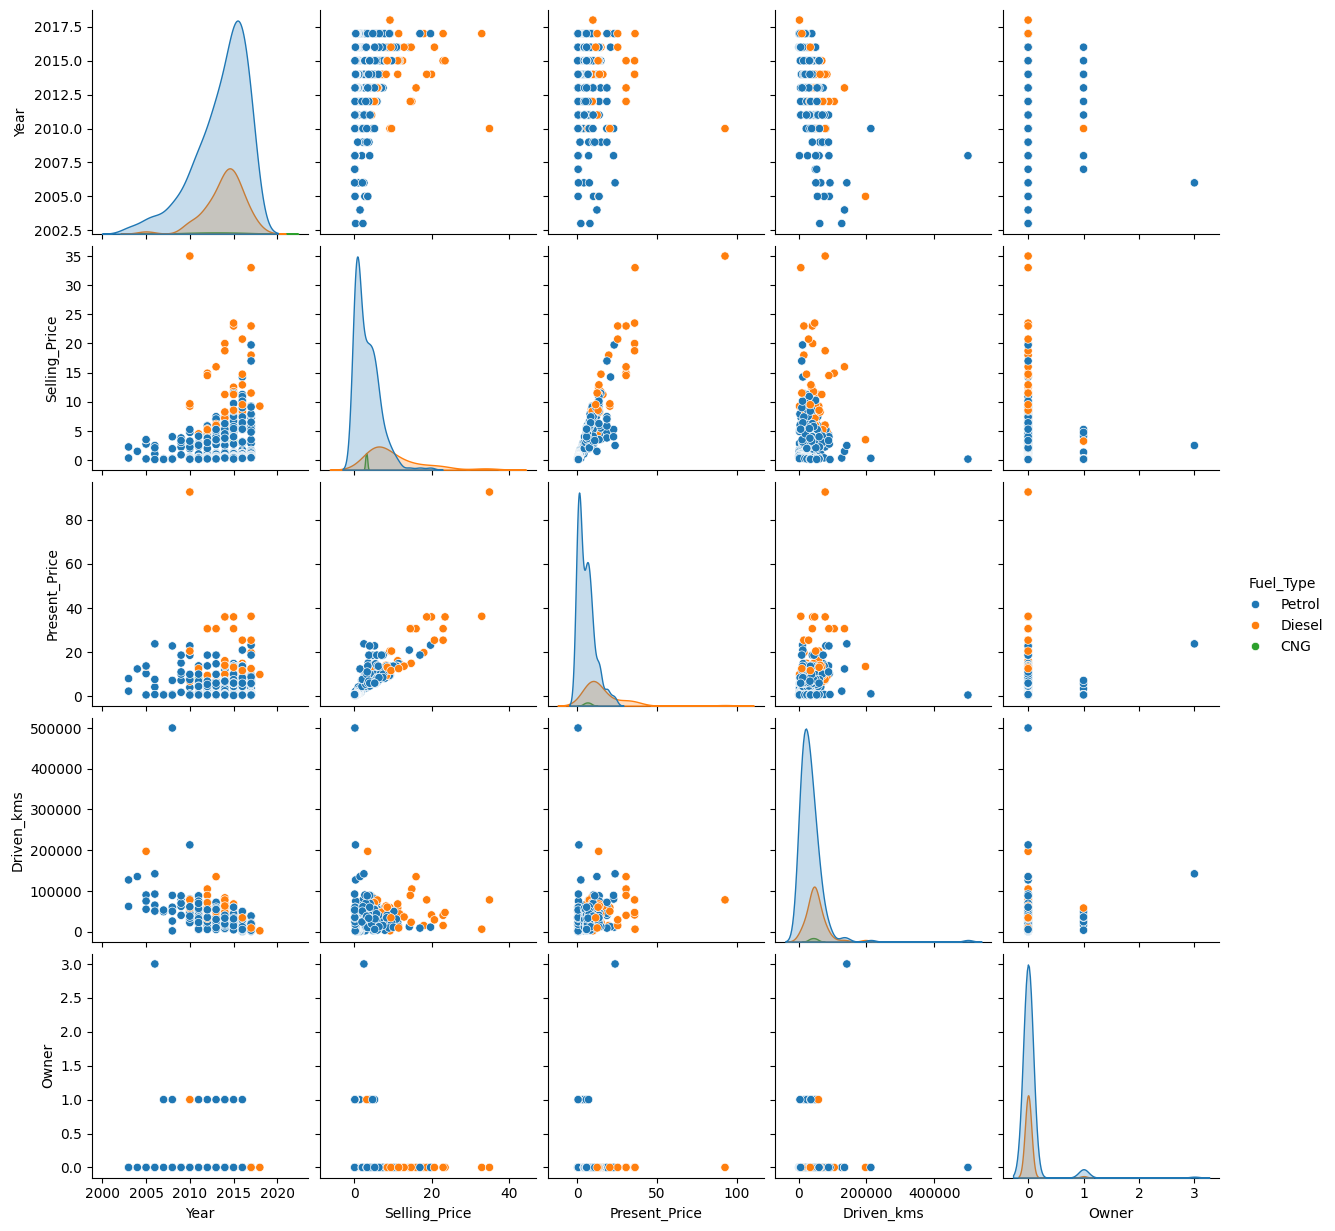

In [23]:
sns.pairplot(data=data,hue='Fuel_Type')

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()
data['Selling_type']=le.fit_transform(data['Selling_type'])
data['Fuel_Type']=le.fit_transform(data['Fuel_Type'])
data['Transmission']=le.fit_transform(data['Transmission'])

In [26]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [27]:
data.drop(['Car_Name'], axis=1, inplace=True)


In [28]:
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


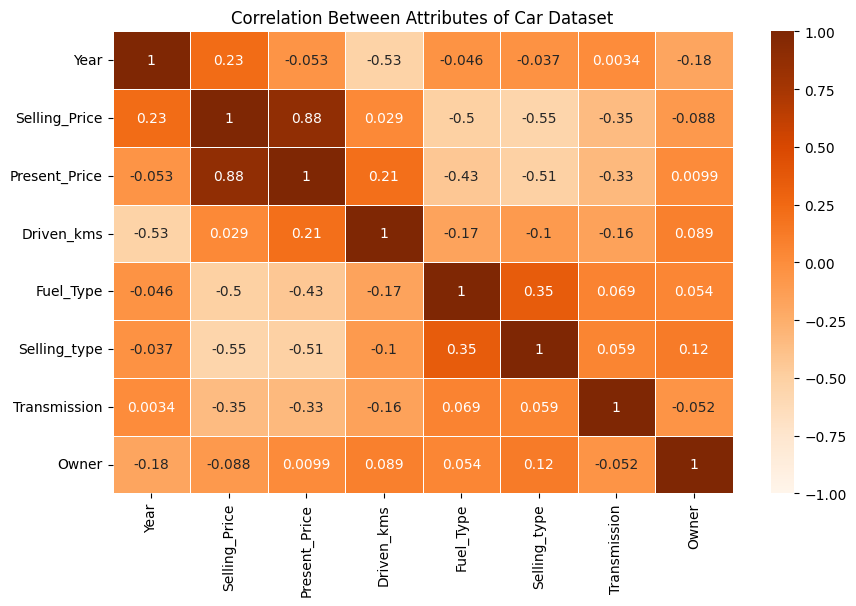

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(data=data.corr(),vmin=-1.0,cmap='Oranges',annot=True,linewidths=0.5)
plt.title('Correlation Between Attributes of Car Dataset')
plt.show()

## MODEL BUILDING 

In [30]:
X=data.drop(columns=['Selling_Price'])
y=data['Selling_Price']
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
linear_regression_pred = linear_regression_model.predict(X_test)
mae = mean_absolute_error(y_test, linear_regression_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.4076189225453903


In [33]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, linear_regression_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5.184404561022858


In [36]:
def predict_car_price(year, present_price, driven_kms, fuel_type, selling_type, transmission, owner):

    fuel_type_encoded = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}.get(fuel_type, -1)
    selling_type_encoded = {'New': 0, 'Used': 1}.get(selling_type, -1)
    transmission_encoded = {'Manual': 0, 'Automatic': 1}.get(transmission, -1)


    new_data = pd.DataFrame({
        'Year': [year],
        'Present_Price': [present_price],
        'Driven_kms': [driven_kms],
        'Fuel_Type': [fuel_type_encoded],
        'Selling_type': [selling_type_encoded],
        'Transmission': [transmission_encoded],
        'Owner': [owner]
    })

 
    prediction = linear_regression_model.predict(new_data)

    return prediction[0]


year = float(input("Enter the year of the car: "))
present_price = float(input("Enter the present price of the car (in lakhs): "))
driven_kms = float(input("Enter the number of kilometers driven: "))
fuel_type = input("Enter the fuel type (Petrol/Diesel/CNG): ")
selling_type = input("Enter the selling type (New/Used): ")
transmission = input("Enter the transmission type (Manual/Automatic): ")
owner = float(input("Enter the number of previous owners: "))


predicted_price = predict_car_price(year, present_price, driven_kms, fuel_type, selling_type, transmission, owner)
print(f"Predicted Selling Price: ${predicted_price:,.2f}")

Enter the year of the car:  2005
Enter the present price of the car (in lakhs):  9.9
Enter the number of kilometers driven:  500
Enter the fuel type (Petrol/Diesel/CNG):  CNG
Enter the selling type (New/Used):  Used
Enter the transmission type (Manual/Automatic):  Manual
Enter the number of previous owners:  1


Predicted Selling Price: $4.32
